<table>
   <tr>     
    <td><img src="./images/logo-qiskit.png" alt="Note: In order for images to show up in this jupyter notebook you need to select File => Trusted Notebook" width="300 px" align="left"></td>
    <td>  </td>
    <td><img src="./images/logo-IBM.png" alt="Note: In order for images to show up in this jupyter notebook you need to select File => Trusted Notebook" width="300 px" align="left"></td>
   </tr>
</table>
<br>


# <center>Welcome </center>
# <center> Lab-1 : Discovery </center>


### Content :
<ol>
    <li>Crash course : using qiskit and IBM backends</li>
    <br>
    <li>Warmup</li>
    <br>
    <li>Exercises</li>
    <br>
    <li>Challenges</li>  
</ol>


<div class="alert alert-block alert-info">

# 1. Crash course : using qiskit and IBM backends
</div>


### Setup

- Install qiskit using the installation guide in qiskit.org : https://qiskit.org/documentation/install.html

(it is recommended to install Anaconda first, and create a conda environement, in which you will install qiskit. 
This will take care of all the needed features, such as matplotlib used for visualization tools).


Verify the following cell runs error free : 


In [1]:
import qiskit
qiskit.__qiskit_version__

/Users/jmt/opt/anaconda3/envs/Q/lib/python3.8/site-packages/qiskit/aqua/__init__.py:86: DeprecationWarning: The package qiskit.aqua is deprecated. It was moved/refactored to qiskit-terra For more information see <https://github.com/Qiskit/qiskit-aqua/blob/main/README.md#migration-guide>
  warn_package('aqua', 'qiskit-terra')


{'qiskit-terra': '0.18.0', 'qiskit-aer': '0.8.2', 'qiskit-ignis': '0.6.0', 'qiskit-ibmq-provider': '0.15.0', 'qiskit-aqua': '0.9.4', 'qiskit': '0.28.0', 'qiskit-nature': None, 'qiskit-finance': None, 'qiskit-optimization': None, 'qiskit-machine-learning': None}

We are ready to go. 

[In case you need it, here is a "Qiskit Cheat-Sheet" for you](http://keeptheketalive.fr/plus/IBMQiskit-Cheat-SheetV23.pdf)

### 1.a Building your first circuit

Let's build a circuit to generate first Bell State $\frac{1}{\sqrt{2}}(|00\rangle +|11\rangle)$

We will need 2 qubits to compute, and two cbits to read the result into, so we need to import `QuantumCircuit`, `QuantumRegister` and `ClassicalRegister`and construct instances of those.

Note about the first Bell state : 


<img src="./images/bell-state.png" alt="Note: In order for images to show up in this jupyter notebook you need to select File => Trusted Notebook" width="350 px" align="center">



this is done using 2 qubits, system starts in state |00⟩ (both $q_0$ and $q_1$ in state |0⟩).
Then $q_0$ goes through Hadamard and gets into equal superposition of |0⟩ and |1⟩. 

Then $q_0$ and $q_1$ go through the CNOT gate (control not, the state of $q_0$ controls a NOT gate on $q_1$. 

After $q_0$ controls $q_1$, the state of $q_1$ is in a superposition of |0⟩ & |1⟩, ($q_1$ stays at |0⟩ when $q_0$ is |0⟩, and $q_1$ goes to |1⟩ when $q_0$ is |1⟩).

So : both $q_0$ and $q_1$ are in |0⟩ state (system is in state |00⟩) or both $q_0$ and $q_1$ are in |1⟩ (system is in state |11⟩).

Our system is in equal superposition of |00⟩ and |11⟩.

The two qubits are entangled together : if you measure any one of the qubits, you immediately know the state of the other !

### First import the needed elements

In [2]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister

Then create the registers, of size 2, then the circuit using those registers (you may also create a circuit with implicit registers, there will be some examples later)

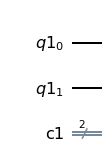

In [4]:
qr = QuantumRegister(2)
cr = ClassicalRegister(2)

qc = QuantumCircuit(qr,cr)

qc.draw(output='mpl')

We can now "build" our circuit, by adding "gates" to the qubits: 

In this example we will need an hadamard gate on qubit 0, and a Cx gate from qubit 0 to qubit 1 

Gates will be method applied to the quantum circuit : 

`qc.h(qr[0])`

`qc.cx(qr[0],qr[1])`

You can refer to the documentation on qiskit.org, or type `dir(qc)` to view the valid methods on that object type. And then Python `help(obj.method)` gives you more information.


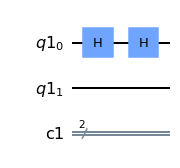

In [6]:
qc.h(qr[0])


qc.draw(output='mpl')

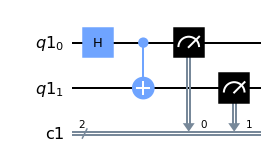

In [8]:
qc = QuantumCircuit(qr,cr)

qc.h(qr[0])
qc.cx(qr[0],qr[1])

qc.measure(qr,cr)

qc.draw(output='mpl')

For small circuits, it can be very usefull to "draw" the circuit while you build it: 

`.draw()` accept `output=` styles : mpl, latex, latex_source, text(=default), ...

In [9]:
from qiskit import execute

Before we execute, we need to make sure we perform a measurement at the end: 

Now we have a circuit, we are ready for execution , we still need : 
    
- to import `execute()` method,



- to decide where we want the circtui to be executed, we will call this a backend, it can be : the local simulator included with the qiskit library `qasm_simulator`, a simulator on the Cloud : `ibmq_qasm_simulator`or a real physical device on IBM Cloud as well, such as `ibmq_athens`. 

Let's first use the local simulator, for this we need to import Aer for simulator functions


   

### 1.b Executing on local simulator




In [10]:
from qiskit import Aer
print(Aer.backends()) #, nicer printout below:
backend_list  = Aer.backends()
for be in backend_list:
    print(be)


[AerSimulator('aer_simulator'), AerSimulator('aer_simulator_statevector'), AerSimulator('aer_simulator_density_matrix'), AerSimulator('aer_simulator_stabilizer'), AerSimulator('aer_simulator_matrix_product_state'), AerSimulator('aer_simulator_extended_stabilizer'), AerSimulator('aer_simulator_unitary'), AerSimulator('aer_simulator_superop'), QasmSimulator('qasm_simulator'), StatevectorSimulator('statevector_simulator'), UnitarySimulator('unitary_simulator'), PulseSimulator('pulse_simulator')]
aer_simulator
aer_simulator_statevector
aer_simulator_density_matrix
aer_simulator_stabilizer
aer_simulator_matrix_product_state
aer_simulator_extended_stabilizer
aer_simulator_unitary
aer_simulator_superop
qasm_simulator
statevector_simulator
unitary_simulator
pulse_simulator


For now, we want to use `qasm_simulator` which emulates a physical backend, so let's get it : 

In [11]:
backend = Aer.get_backend('qasm_simulator')

Now let's create our "job" to execute, `.execute()` requires that we pass the circuit and the backend (there are a number of optionnal argument, we will discuss "shots" soon : 

In [17]:
job = execute(qc,backend,shots=1024)

In [18]:
print(job)

Extracting results

In [19]:
my_results = job.result()

In [20]:
print(my_results)

Result(backend_name='qasm_simulator', backend_version='0.8.2', qobj_id='05719373-af3a-4264-ae80-a5bcac10a2ca', job_id='8e187649-abd3-44bc-916b-25ed309a8958', success=True, results=[ExperimentResult(shots=1024, success=True, meas_level=2, data=ExperimentResultData(counts={'0x0': 498, '0x3': 526}), header=QobjExperimentHeader(clbit_labels=[['c1', 0], ['c1', 1]], creg_sizes=[['c1', 2]], global_phase=0.0, memory_slots=2, metadata=None, n_qubits=2, name='circuit-12', qreg_sizes=[['q1', 2]], qubit_labels=[['q1', 0], ['q1', 1]]), status=DONE, seed_simulator=4216342534, metadata={'parallel_state_update': 4, 'parallel_shots': 1, 'measure_sampling': True, 'method': 'stabilizer', 'fusion': {'enabled': False}}, time_taken=0.004688585)], date=2022-01-21T16:48:11.228459, status=COMPLETED, status=QobjHeader(backend_name='qasm_simulator', backend_version='0.8.2'), metadata={'mpi_rank': 0, 'time_taken': 0.0052548180000000005, 'max_gpu_memory_mb': 0, 'max_memory_mb': 8192, 'parallel_experiments': 1, 'nu

Reading results :

In [21]:
print(my_results.get_counts())

{'00': 498, '11': 526}


notes : 
- results are stored in a Python dictionnary, keys are the measurement basis, values are the number of times the measurement collapsed to that particular basis.
- the circuit has been run 1024 time, this is the default value for the keword parameter `shots`in `.execute()`. 

You can try values from `shots=1` to `shots=8192`

In [22]:
# with shots=1, you will get a count of 1 either on 00 or on 11
job = execute(qc,backend, shots=111)
my_results = job.result()
print(my_results.get_counts(qc))

{'11': 52, '00': 59}


It is also usefull to be able to visualize the results on a bar chart : 

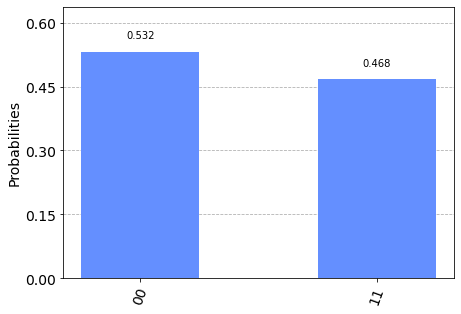

In [23]:
from qiskit.tools.visualization import plot_histogram
plot_histogram(my_results.get_counts(qc))

On more thing about reading results. We get used to enumerate qubits from top to bottom of a circuit, $q_0, q_1, ... , q_n$. The measurement will code multiple qubits in a binary register this way $q_n,..., q_1, q0$, in other words $q_0$ is the least significant bit. 


Let's see the following experiment, using $X$ (not) and $id$ (identity):  

In [24]:
qr = QuantumRegister(2)
cr = ClassicalRegister(2)
qc = QuantumCircuit(qr,cr)


qc.x(qr[0])
qc.id(qr[1])

qc.measure(qr,cr)

qc.draw()

┌───┐┌─┐   
q35_0: ┤ X ├┤M├───
       ├───┤└╥┘┌─┐
q35_1: ┤ I ├─╫─┤M├
       └───┘ ║ └╥┘
 c2: 2/══════╩══╩═
             0  1

In this case we will measure a state correspondding to $q_0 = 1$ and $q_1= 0$, in the form $q_1q_0 = 01$

In [ ]:
# with shots=1, you will get a count of 1 either on 00 or on 11
job = execute(qc,backend, shots=1024)
my_results = job.result()
print(my_results.get_counts(qc))

### 1.c Executing on a physical backend




Let's restart with the Bell State circuit 

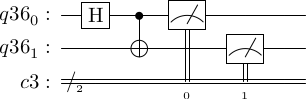

In [25]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute

qr = QuantumRegister(2)
cr = ClassicalRegister(2)
qc = QuantumCircuit(qr,cr)

qc.h(qr[0])
qc.cx(qr[0],qr[1])
qc.measure(qr,cr)
qc.draw(output='latex')


# all in one script

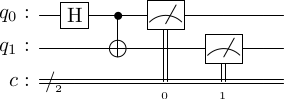

In [1]:
from qiskit import QuantumCircuit, QuantumRegister,ClassicalRegister
from qiskit import Aer, execute

qr = QuantumRegister(2,'q')
cr = ClassicalRegister(2,'c')
qc = QuantumCircuit(qr,cr)

qc.h(qr[0])
qc.cx(qr[0],qr[1])
qc.measure(qr,cr)
qc.draw(output='latex')


In [2]:
job = execute(qc, Aer.get_backend('qasm_simulator'))
print(job.result().get_counts())

{'00': 495, '11': 529}


`qc` is ready !

In [28]:
# how to use the machines and simulator in the cloud

from qiskit import IBMQ
MY_API_TOKEN= 'c4dc42d9c285a96572438ab0423a14235b39ee657d1f99c05b5b72b0bbabb743405d46651ca81e819e676ae365828f259f81bd005ce4c5c985e4eeb0db0ce11d'
IBMQ.save_account(MY_API_TOKEN, overwrite=True)
IBMQ.load_account()

sp = IBMQ.get_provider(hub='ibm-q')

# list backends available for this provider
print(sp.backends())

sp = IBMQ.get_provider(hub='ibm-q')   # selected provider

backends_set = set()
for b in sp.backends():
    backends_set.add(str(b))
   
print("backend name                    queue qubits operational status message")
print("------------------------------- ----- ------ ----------- --------------")
for b in backends_set: 
    be = sp.get_backend(b)
    pj = be.status().pending_jobs
    qb = be.configuration().n_qubits
    op = be.status().operational 
    sm = be.status().status_msg
    print(f"{b:32} {pj:4} {qb:6}{op:12} {sm:6}")
print("------------------------------ ----- ------ ----------- --------------")

backend = sp.get_backend('simulator_statevector')


ibmqfactory.load_account:WARNING:2022-01-21 16:54:45,878: Credentials are already in use. The existing account in the session will be replaced.


[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_bogota') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQSimulator('simulator_extended_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQSimulator('simulator_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_manila') fro

In [ ]:
# IBMQ for access to online devices and helps manage your IBM Q account data from your workstation. 
from qiskit import IBMQ

If you never used your API key before, go to IBM Quantum Experience on the web, register for free with your email or Google, Twitter... account. Totally free. 

Go to my accoung and copy your API token, paste it below. It will be saved on your disk for later use.

The token is used to manage "fair share" : you are allowed to submit 5 jobs per day to a real quantum computer. When you submit more jobs, your priority in the queue will be degraded. 

In [ ]:
MY_API_TOKEN= 'e5f5ed26c560465a044adb6bbbad67743cd41365ff700fe7ab7104ef83518ccff6b28b4b52ecd827de2df397aba6a6e8eb88cc154842ab203f1aadfbdff3f024'
IBMQ.save_account(MY_API_TOKEN, overwrite=True)

In [ ]:
IBMQ.load_account()

In [ ]:
# choose one available provider
selected_provider = IBMQ.get_provider(hub='ibm-q')

In [ ]:
# list backends available for this provider
selected_provider.backends()

In [ ]:
# small program to get backends configs and status
# using least_busy() is more straightforward, this is to show
# how we get info from the provider's backends

sp = IBMQ.get_provider(hub='ibm-q')   # selected provider

backends_set = set()
for b in selected_provider.backends():
    backends_set.add(str(b))
   
print("backend name                    queue qubits operational status message")
print("------------------------------- ----- ------ ----------- --------------")
for b in backends_set: 
    be = sp.get_backend(b)
    pj = be.status().pending_jobs
    qb = be.configuration().n_qubits
    op = be.status().operational 
    sm = be.status().status_msg
    print(f"{b:32} {pj:4} {qb:6}{op:12} {sm:6}")
print("------------------------------ ----- ------ ----------- --------------")

You can also automate your backend selection, using `least_busy` : 

In [31]:
backend = sp.get_backend('ibmq_belem')
backend.name()

'ibmq_belem'

In [30]:
# we want more than 1 qubit (we need 2), on an operationnal backend which is not a simulator
from qiskit.providers.ibmq import least_busy

backend = least_busy(sp.backends(filters = lambda x: x.configuration().n_qubits >= 2 and 
                                       not x.configuration().simulator and x.status().operational == True))

print("least busy backend: ", backend)

least busy backend:  ibmq_belem


In [32]:
# execution
from qiskit.tools.monitor import job_monitor

job = execute(qc,backend)
print(job.job_id())
job_monitor(job)

61ead86aded89e3a29a9e4e0
Job Status: job has successfully run


In [33]:
res = job.result()
from qiskit.tools.visualization import plot_histogram

d = (res.get_counts(qc))
d

{'00': 489, '01': 27, '10': 29, '11': 479}

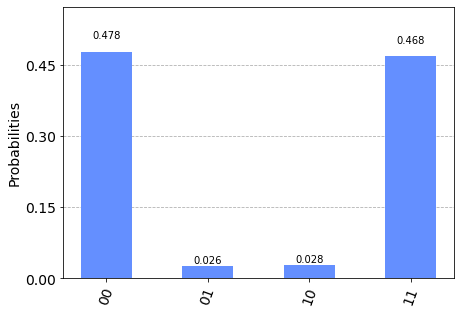

In [34]:
plot_histogram(d)

<div class="alert alert-block alert-info">

# 2. Try it yourself

</div>

##  CONTROL-CONTROL-NOT, CCNOT, ccx, aka Toffoli gate

### if a = 1 and b = 1, then flip c
<img src="./images/Toffoli.png" alt="Note: In order for images to show up in this jupyter notebook you need to select File => Trusted Notebook" width="350 px" align="left">

control-control-not syntax : 

`<circuit>.ccx(control_qubitA, control_qubitB, target_qubit)`

Build a circuit, and run it using non trival input values


##  CONTROL-SWAP aka Fredkin gate


### if a = 1 then swap b and c states.
<img src="./images/Fredkin.png" alt="Note: In order for images to show up in this jupyter notebook you need to select File => Trusted Notebook" width="350 px" align="left">
Notes: 
 
    

control-swap syntax: 

`<circuit>.cswap(control_qubit, swapped_qubit, swapped_qubit)`

Build a circuit, and run it using non trival input values


<div class="alert alert-block alert-info">

# 3. Exercices 
</div>

# Introduction to Qiskit
Welcome to the Quantum Challenge! Here you will be using Qiskit, the open source quantum software development kit developed by IBM Quantum and community members around the globe. The following exercises will familiarize you with the basic elements of Qiskit and quantum circuits. 

To begin, let us define what a quantum circuit is:

> **"A quantum circuit is a computational routine consisting of coherent quantum operations on quantum data, such as qubits. It is an ordered sequence of quantum gates, measurements, and resets, which may be conditioned on real-time classical computation."** (https://qiskit.org/textbook/ch-algorithms/defining-quantum-circuits.html)

While this might be clear to a quantum physicist, don't worry if it is not self-explanatory to you.  During this exercise you will learn what a qubit is, how to apply quantum gates to it, and how to measure its final state. You will then be able to create your own quantum circuits! By the end, you should be able to explain the fundamentals of quantum circuits to your colleagues.

Before starting with the exercises, please run cell *Cell 1* below by clicking on it and pressing 'shift' + 'enter'. This is the general way to execute a code cell in the Jupyter notebook environment that you are using now. While it is running, you will see `In [*]:` in the top left of that cell. Once it finishes running, you will see a number instead of the star, which indicates how many cells you've run. You can find more information about Jupyter notebooks here: https://qiskit.org/textbook/ch-prerequisites/python-and-jupyter-notebooks.html.

---

In [ ]:
import numpy as np

from qiskit import Aer, QuantumCircuit, execute
from qiskit.visualization import plot_histogram, plot_state_qsphere
from qiskit.quantum_info import Statevector
from IPython.display import display, Math, Latex



## Exercise I:  Basic Operations on Qubits and Measurements

### Writing down single-qubit states
Let us start by looking at a single qubit. The main difference between a classical bit, which can take the values 0 and 1 only, is that a quantum bit, or **qubit**, can be in the states $\vert0\rangle$, $\vert1\rangle$, as well as a linear combination of these two states. This feature is known as superposition, and allows us to write the most general state of a qubit as: 

$$\vert\psi\rangle = \sqrt{1-p}\vert0\rangle + e^{i \phi} \sqrt{p}  \vert1\rangle$$

If we were to measure the state of this qubit, we would find the result $1$ with probability $p$, and the result $0$ with probability $1-p$. As you can see, the total probability is $1$, meaning that we will indeed measure either $0$ or $1$, and no other outcomes exists.

In addition to $p$, you might have noticed another parameter above. The variable $\phi$ indicates the relative quantum phase between the two states $\vert0\rangle$ and $\vert1\rangle$. As we will discover later, this relative phase is quite important. For now, it suffices to note that the quantum phase is what enables interference between quantum states, resulting in our ability to write quantum algorithms for solving specific tasks.

If you are interested in learning more, we refer you to [the section in the Qiskit textbook on representations of single-qubit states](https://qiskit.org/textbook/ch-states/representing-qubit-states.html).

### Visualizing quantum states
We visualize quantum states throughout this exercise using what is known as a `qsphere`. Here is how the `qsphere` looks for the states $\vert0\rangle$ and $\vert1\rangle$, respectively. Note that the top-most part of the sphere represents the state $\vert0\rangle$, while the bottom represents $\vert1\rangle$.

<img src="./images/qsphere01.png" alt="qsphere with states 0 and 1" style="width: 400px;"/>

It should be no surprise that the superposition state with quantum phase $\phi = 0$ and probability $p = 1/2$ (meaning an equal likelihood of measuring both 0 and 1) is shown on the `qsphere` with two points. However, note also that the size of the circles at the two points is smaller than when we had simply $\vert0\rangle$ and $\vert1\rangle$ above. This is because the size of the circles is proportional to the probability of measuring each one, which is now reduced by half.

<img src="./images/qsphereplus.png" alt="qsphere with superposition 1" style="width: 200px;"/>

In the case of superposition states, where the quantum phase is non-zero, the qsphere allows us to visualize that phase by changing the color of the respective blob. For example, the state with $\phi = 90^\circ$ (degrees) and probability $p = 1/2$ is shown in the `qsphere` below. 

<img src="./images/qspherey.png" alt="qsphere with superposition 2" style="width: 200px;"/>

### Manipulating qubits
Qubits are manipulated by applying quantum gates. Let's go through an overview of the different gates that we will consider in the following exercises.

First, let's describe how we can change the value of $p$ for our general quantum state. To do this, we will use two gates:

1. **$X$-gate**: This gate flips between the two states $\vert0\rangle$ and $\vert1\rangle$. This operation is the same as the classical NOT gate. As a result, the $X$-gate is sometimes referred to as a bit flip or NOT gate. Mathematically, the $X$ gate changes $p$ to $1-p$, so in particular from 0 to 1, and vice versa.

2. **$H$-gate**: This gate allows us to go from the state $\vert0\rangle$  to the state $\frac{1}{\sqrt{2}}\left(\vert0\rangle + \vert1\rangle\right)$. This state is also known as the $\vert+\rangle$. Mathematically, this means going from $p=0, \phi=0$ to  $p=1/2, \phi=0$.  As the final state of the qubit is a superposition of $\vert0\rangle$ and $\vert1\rangle$, the Hadamard gate represents a true quantum operation.

Notice that both gates changed the value of $p$, but not $\phi$. Fortunately for us, it's quite easy to visualize the action of these gates by looking at the figure below.

<img src="./images/quantumgates.png" alt="quantum gates" style="width: 400px;"/>

Once we have the state $\vert+\rangle$, we can then change the quantum phase by applying several other gates. For example, an $S$ gate adds a phase of $90$ degrees to $\phi$, while the $Z$ gate adds a phase of $180$ degrees to $\phi$. To subtract a phase of $90$ degrees, we can apply the $S^\dagger$ gate, which is read as S-dagger, and commonly written as `sdg`. Finally, there is a $Y$ gate which applies a sequence of $Z$ and $X$ gates.

If you want to learn more about describing quantum states, Pauli operators, and other single-qubit gates, see chapter 1 of our textbook: https://qiskit.org/textbook/ch-states/introduction.html.

Here are four small exercises to attain different states on the qsphere. These are the syntax for use into your program to apply the different gates: 

    qc.x(0)    # bit flip
    qc.y(0)    # bit and phase flip
    qc.z(0)    # phase flip
    qc.h(0)    # superpostion
    qc.s(0)    # quantum phase rotation by pi/2 (90 degrees)
    qc.sdg(0)  # quantum phase rotation by -pi/2 (90 degrees)
    
The '(0)' indicates that we apply this gate to qubit 'q0', which is the first (and in this case only) qubit.

Try to attain the given state on the qsphere in each of the following exercises.
### I.i) Let us start  by performing a bit flip. The goal is to reach the state $\vert1\rangle$ starting from state $\vert0\rangle$. <img src="./images/state1.png" width="300"> 


In [ ]:
# 1
def create_circuit():
    qc = QuantumCircuit(1)
    #
    # FILL YOUR CODE IN HERE
    #
    #
    return qc

# check solution

qc = create_circuit()

sv = Statevector.from_label('0')
sv = sv.evolve(qc)

plot_state_qsphere(sv.data, show_state_labels=True, show_state_phases=True) 

### I.ii) Next, let's create a superposition. The goal is to reach the state $|+\rangle = \frac{1}{\sqrt{2}}\left(|0\rangle + |1\rangle\right)$. <img src="./images/stateplus.png" width="300"> 

In [ ]:
# 2
def create_circuit():
    qc = QuantumCircuit(1)
    #
    #
    # FILL YOUR CODE IN HERE
    #
    #
    return qc

qc = create_circuit()
sv = Statevector.from_label('0')
sv = sv.evolve(qc)
plot_state_qsphere(sv.data, show_state_labels=True, show_state_phases=True) 

### I.iii) Let's combine those two. The goal is to reach the state $|-\rangle = \frac{1}{\sqrt{2}}\left(|0\rangle - |1\rangle\right)$. <img src="./images/stateminus.png" width="300"> 


In [ ]:
# 3
def create_circuit():
    qc = QuantumCircuit(1)
    #
    #
    # FILL YOUR CODE IN HERE
    #
    #
    return qc

qc = create_circuit()
sv = Statevector.from_label('0')
sv = sv.evolve(qc)
plot_state_qsphere(sv.data, show_state_labels=True, show_state_phases=True) 

### I.iv) Finally, we move on to the complex numbers. The goal is to reach the state $|\circlearrowleft\rangle = \frac{1}{\sqrt{2}}\left(|0\rangle - i|1\rangle\right)$. <img src="./images/stateleft.png" width="300"> 

In [ ]:
# 4
def create_circuit():
    qc = QuantumCircuit(1)
    #
    #
    # FILL YOUR CODE IN HERE
    # 
    #
    #
    return qc

qc = create_circuit()
sv = Statevector.from_label('0')
sv = sv.evolve(qc)
plot_state_qsphere(sv.data, show_state_labels=True, show_state_phases=True) 


## Exercise II: Quantum Circuits Using Multi-Qubit Gates

Great job! Now that you've understood the single-qubit gates, let us look at gates operating on multiple qubits. The basic gates on two qubits are given by

    qc.cx(c,t)       # controlled-X (= CNOT) gate with control qubit c and target qubit t
    qc.cz(c,t)       # controlled-Z gate with control qubit c and target qubit t
    qc.swap(a,b)     # SWAP gate that swaps the states of qubit a and qubit b

If you'd like to read more about the different multi-qubit gates and their relations, visit chapter 2 of our textbook: https://qiskit.org/textbook/ch-gates/introduction.html.

We can now have up to four points on the qsphere.

We start with the canonical two qubit gate, the controlled-NOT (also CNOT or CX) gate.  Here, as with all controlled two qubit gates, one qubit is labelled as the "control", while the other is called the "target". If the control qubit is in state $|0\rangle$, it applies the identity $I$ gate to the target, i.e., no operation is performed. Instead, if the control qubit is in state $|1\rangle$, an X-gate is performed on the target qubit. Therefore, with both qubits in one of the two classical states, $|0\rangle$ or $|1\rangle$, the CNOT gate is limited to classical operations.

This situation changes dramatically when we first apply a Hadamard gate to the control qubit, bringing it into the superposition state $|+\rangle$.  The action of a CNOT gate on this non-classical input can produce highly entangled states between control and target qubits. If the target qubit is initially in the $|0\rangle$ state, the resulting state is denoted by $|\Phi^+\rangle$, and is one of the so-called Bell states. 

### II.i) Construct the Bell state $|\Phi^+\rangle = \frac{1}{\sqrt{2}}\left(|00\rangle + |11\rangle\right)$.  <img src="./images/phi+.png" width="300"> 
For this state we would have probability $\frac{1}{2}$ to measure "00" and probability $\frac{1}{2}$ to measure "11". Thus, the outcomes of both qubits are perfectly correlated.

In [ ]:
# 5
def create_circuit():
    qc = QuantumCircuit(2)
    #
    #
    # FILL YOUR CODE IN HERE
    qc.h(0)
    qc.cx(0,1)
    #
    return qc

qc = create_circuit()
sv = Statevector.from_label('00')
sv = sv.evolve(qc)
plot_state_qsphere(sv.data, show_state_labels=True, show_state_phases=True) 

Next, try to create the state of perfectly anti-correlated qubits. Note the minus sign here, which indicates the relative phase between the two states. 
### II.ii) Construct the Bell state $\vert\Psi^-\rangle = \frac{1}{\sqrt{2}}\left(\vert01\rangle - \vert10\rangle\right)$. <img src="./images/psi-.png" width="300"> 

In [ ]:
# 6
def create_circuit():
    qc = QuantumCircuit(2,2) # this time, we not only want two qubits, but also 
                             # two classical bits for the measurement later
    #
    #
    # FILL YOUR CODE IN HERE
    #
    
    return qc

qc = create_circuit()
sv = Statevector.from_label('00')
sv = sv.evolve(qc)
print(sv)
plot_state_qsphere(sv.data, show_state_labels=True, show_state_phases=True) 

As you can tell from the circuit (and the code) we have added measurement operators to the circuit. Note that in order to store the measurement results, we also need two classical bits, which we have added when creating the quantum circuit: `qc = QuantumCircuit(num_qubits, num_classicalbits)`.

In *Cell 8* we have defined a function `run_circuit()` that will run a circuit on the simulator. If the right state is prepared, we have probability $\frac{1}{2}$ to measure each of the two outcomes, "01" and "10". However, performing the measurement with 1000 shots does not imply that we will measure exactly 500 times "01" and 500 times "10".  Just like flipping a coin multiple times, it is unlikely that one will get exactly a 50/50 split between the two possible output values.  Instead, there are fluctuations about this ideal distribution. You can call `run_circuit` multiple times to see the variance in the ouput.


In [ ]:
# 7
qc.measure(0, 0) # we perform a measurement on qubit q_0 and store the information on the classical bit c_0
qc.measure(1, 1) # we perform a measurement on qubit q_1 and store the information on the classical bit c_1
qc.draw(output='mpl') # we draw the circuit

In [ ]:
# 8
def run_circuit(qc):
    backend = Aer.get_backend('qasm_simulator') # we choose the simulator as our backend
    result = execute(qc, backend, shots = 1000).result() # we run the simulation
    counts = result.get_counts() # we get the counts
    return counts

counts = run_circuit(qc)
print(counts)
plot_histogram(counts) # let us plot a histogram to see the possible outcomes and corresponding probabilities

### II.iii) You are given the quantum circuit described in the function below. Swap the states of the first and the second qubit.  
This should be your final state: <img src="./images/stateIIiii.png" width="300"> 

In [ ]:
# 9
def create_circuit():
    qc = QuantumCircuit(2)
    ## initializing part
    qc.rx(np.pi/3,0)
    qc.x(1)
    ## end of initializing
    #
    #
    # FILL YOUR CODE IN HERE
    #
    #
    
    return qc


qc = create_circuit()
sv = Statevector.from_label('00')
sv = sv.evolve(qc)
print(sv)
plot_state_qsphere(sv.data, show_state_labels=True, show_state_phases=True) 

### II.iv) Write a program from scratch that creates the GHZ state (on three qubits), $\vert \text{GHZ}\rangle = \frac{1}{\sqrt{2}} \left(|000\rangle + |111 \rangle \right)$, performs a measurement with 2000 shots, and returns the counts.  <img src="./images/ghz.png" width="300"> 


In [ ]:
# 10
#
#
# FILL YOUR CODE IN HERE
#
#


Congratulations for finishing this introduction to Qiskit! 

<div class="alert alert-block alert-info">

# 4. Challenges
</div>

# 4.1 : The Adder : 


- This is a 2 qubits full adder (ie. with carry in and carry out) : 

<img src="./images/adder.png" alt="full 2 qubit adder" style="width: 600px;"/>

- build the corresponding quantum circuit with 4 qubits and 4 cbits. 

- automate it to verify the result for all 8 possible inputs.


In [ ]:
#
#
# FILL YOUR CODE IN HERE
#
#    

# 4.2 : Your Initials


The purpose of this exercise is to build a circuit that produces two equally probable bitstrings, using state superposition and qubit entaglement.

We will use a 7 qubit register and the ASCII code to represent letters from A to Z. ($b'1000001'$ for A to $b'1011010'$ for Z). 

Choose 2 different letters from the alphabet, they could be your name initials. For example Tom Gillmore would use G and T. And the result will show something like this : 

<img src="./images/GT-initials.png" alt="Note: In order for images to show up in this jupyter notebook you need to select File => Trusted Notebook" width="350 px" align="center">


Imports and letters display tools are provided, you will only need to build the circuit. 

You will have to : 

- pick-up two different letters (firstname, name, use middlemane if firstname and name have the same) 
- look-up for their binary ASCII values
- build a quantum circuit that outputs an equal superposition of those two values 

Here are the ASCII values for A to Z : 



| Letter | binary ASCII value | Letter | binary ASCII value | 
| ------ | ------------------ | ------ | ------------------ |
| A | 100 0001 | N | 100 1110 |
| B | 100 0010 | O | 100 1111 | 
| C | 100 0011 | P | 101 0000 |
| D | 100 0100 | Q | 101 0001 |
| E | 100 0101 | R | 101 0010 |
| F | 100 0110 | S | 101 0011 |
| G | 100 0111 | T | 101 0100 |
| H | 100 1000 | U | 101 0101 |
| I | 100 1001 | V | 101 0110 |
| J | 100 1010 | W | 101 0111 |
| K | 100 1011 | X | 101 1000 |
| L | 100 1100 | Y | 101 1001 |
| M | 100 1101 | Z | 101 1010 |


In [ ]:
from qiskit import ClassicalRegister, QuantumRegister
from qiskit import QuantumCircuit, execute
from qiskit.tools.visualization import plot_histogram
from qiskit import IBMQ, BasicAer
from qiskit.tools.jupyter import *
import matplotlib.pyplot as plt
%matplotlib inline

Build your circuit below, please name it `qc`

In [ ]:
####


In [ ]:
backend = BasicAer.get_backend('qasm_simulator')
shots_sim = 10

job_sim = execute(qc, backend, shots=shots_sim)
stats_sim = job_sim.result().get_counts()

def plot_letter (stats, shots):
    ### code from the qiskit.org smiley demo
    for bitString in stats:
        char = chr(int( bitString[0:7] ,2)) # get string of the leftmost 7 bits and convert to an ASCII character
        prob = stats[bitString] / shots # fraction of shots for which this result occurred
        # create plot with all characters on top of each other with alpha given by how often it turned up in the output
        plt.annotate( char, (0.5,0.5), va="center", ha="center", color = (0,0,0, prob ), size = 300)
        if (prob>0.05): # list prob and char for the dominant results (occurred for more than 5% of shots)
            print(str(prob)+"\t"+char)
    plt.axis('off')
    plt.show()
    
print(shots_sim) 
print(stats_sim)
plot_letter(stats_sim, shots_sim)